**https://www.sciencedirect.com/science/article/pii/B9780123965011000066#:~:text=The%20blurring%20operation%20can%20be%20characterized%20by%20the,a%202-D%20impulse%20response%20of%20the%20imaging%20process.**

In [22]:
import numpy as np
import PIL as Image
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.metrics import peak_signal_noise_ratio

import warnings
warnings.filterwarnings("ignore")

In [2]:
img = cv2.imread('images/dhoni.jpg')

In [3]:
img_colour = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray   = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
sizee = img_gray.shape

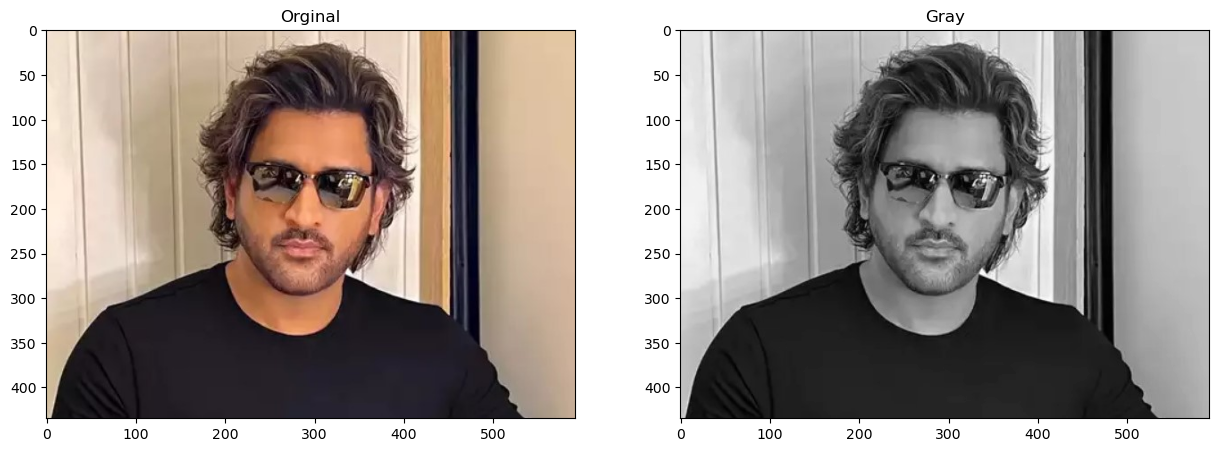

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Orginal")
plt.imshow(img_colour)
plt.subplot(1,2,2)
plt.title("Gray")
plt.imshow(img_gray,cmap='gray')

In [6]:
gauss          = np.random.normal(10,20,sizee)
gaussian       = img_gray+gauss
gaussian_noise = np.clip(0,255,gaussian).astype(np.uint8)

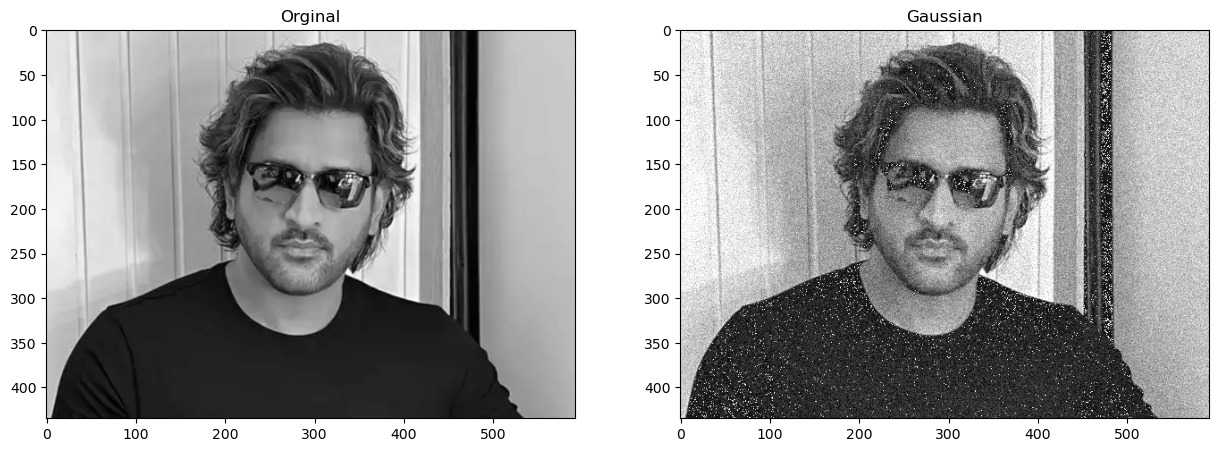

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Orginal")
plt.imshow(img_gray,cmap='gray')
plt.subplot(1,2,2)
plt.title("Gaussian")
plt.imshow(gaussian_noise,cmap='gray')

### Weiner Filter
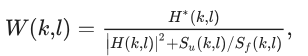
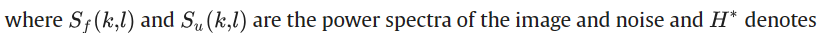
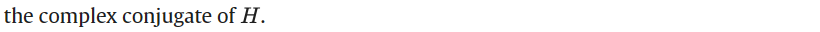

In [39]:
def Wiener(noise,k=0.1,kernal=np.ones((5,5))/25):
    #fourier_Transform
    fourier_transform = np.fft.fft2(gaussian_noise)
    #kernal - PSF function
    kernal = kernal
    
    fft_kernal = np.fft.fft2(kernal, s=gaussian_noise.shape)
    #weiner formula
    fft_H = np.conj(fft_kernal) / (np.abs(fft_kernal)**2 + 0.1 * np.ones(fft_kernal.shape))
    filtered_freq = fourier_transform * fft_H                     #applying weiner filter
    estimated_image = np.abs(np.fft.ifft2(filtered_freq))     #inverse fourier Transform
    return estimated_image

In [40]:
estimated_image    = Wiener(gaussian_noise)
estimated_image_7  = Wiener(gaussian_noise,k=0.01)

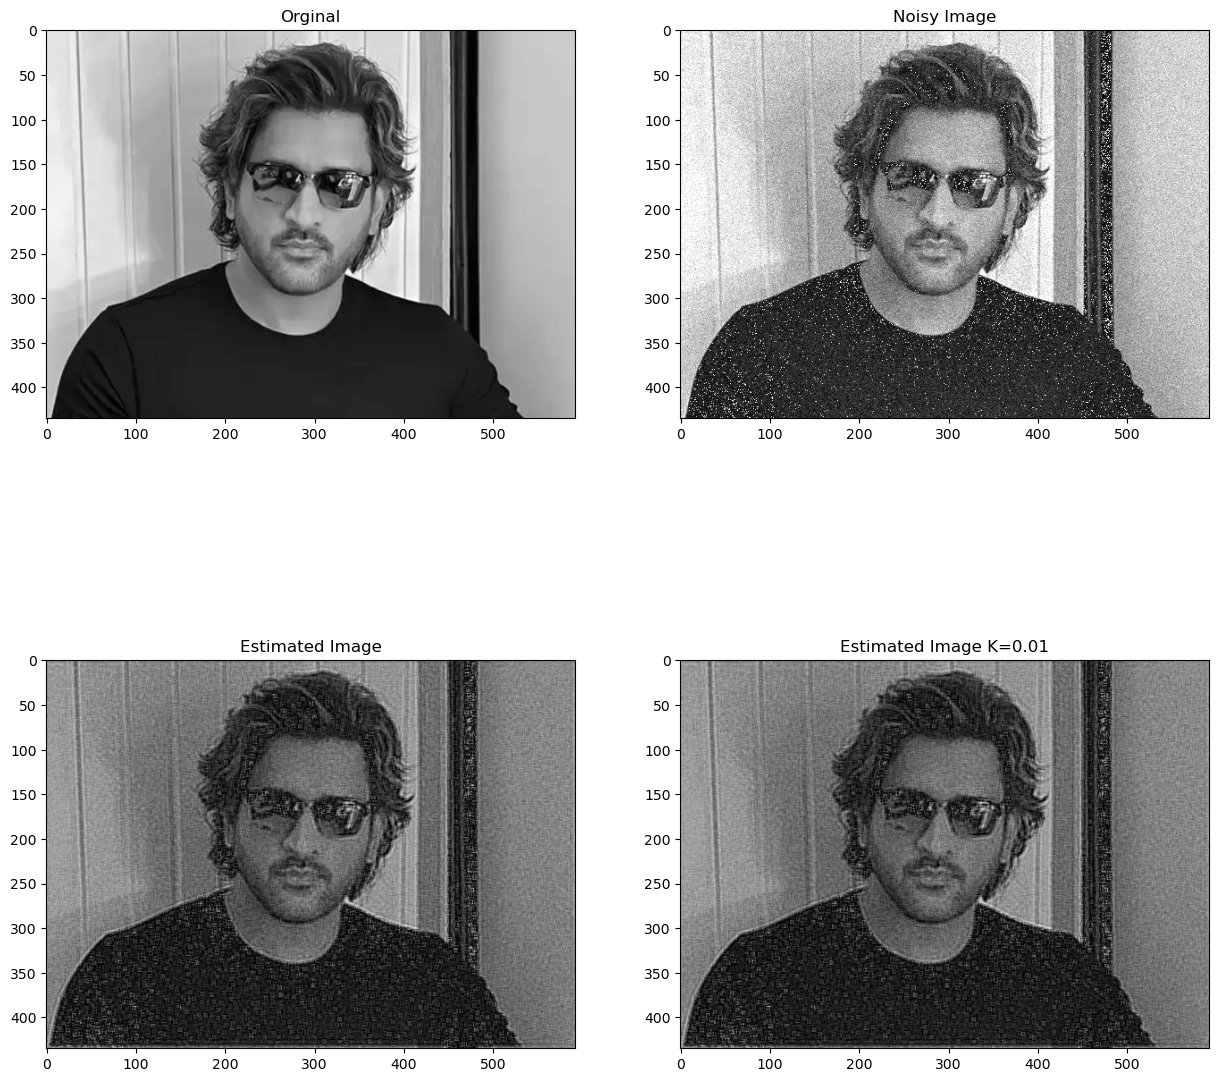

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(img_gray,cmap='gray')
plt.subplot(2,2,2)
plt.title("Noisy Image")
plt.imshow(gaussian_noise,cmap='gray')
plt.subplot(2,2,3)
plt.title("Estimated Image")
plt.imshow(estimated_image,cmap='gray')
plt.subplot(2,2,4)
plt.title("Estimated Image K=0.01")
plt.imshow(estimated_image_7,cmap='gray')

In [23]:
def map_restore(g_img, kernel=np.ones((5, 5)) / 25, nlevel=100, iters=10):
    f_img = g_img.copy()
    for i in range(iters):
        blur_estimate = convolve2d(f_img, kernel, mode='same', boundary='wrap')
        data_likelihood = np.exp(-0.5 * ((g_img - blur_estimate) / nlevel) ** 2)
        prior_likelihood = np.ones_like(f_img)  # Uniform prior
        posterior = data_likelihood * prior_likelihood
        f_img = posterior / np.sum(posterior)
    return 1 - f_img

In [29]:
estimated_image   = map_restore(gaussian_noise)
estimated_image_2 = map_restore(gaussian_noise,iters=100)

In [32]:
psn  = peak_signal_noise_ratio(img_gray/255, estimated_image)
psn2 = peak_signal_noise_ratio(img_gray/255, estimated_image_2)


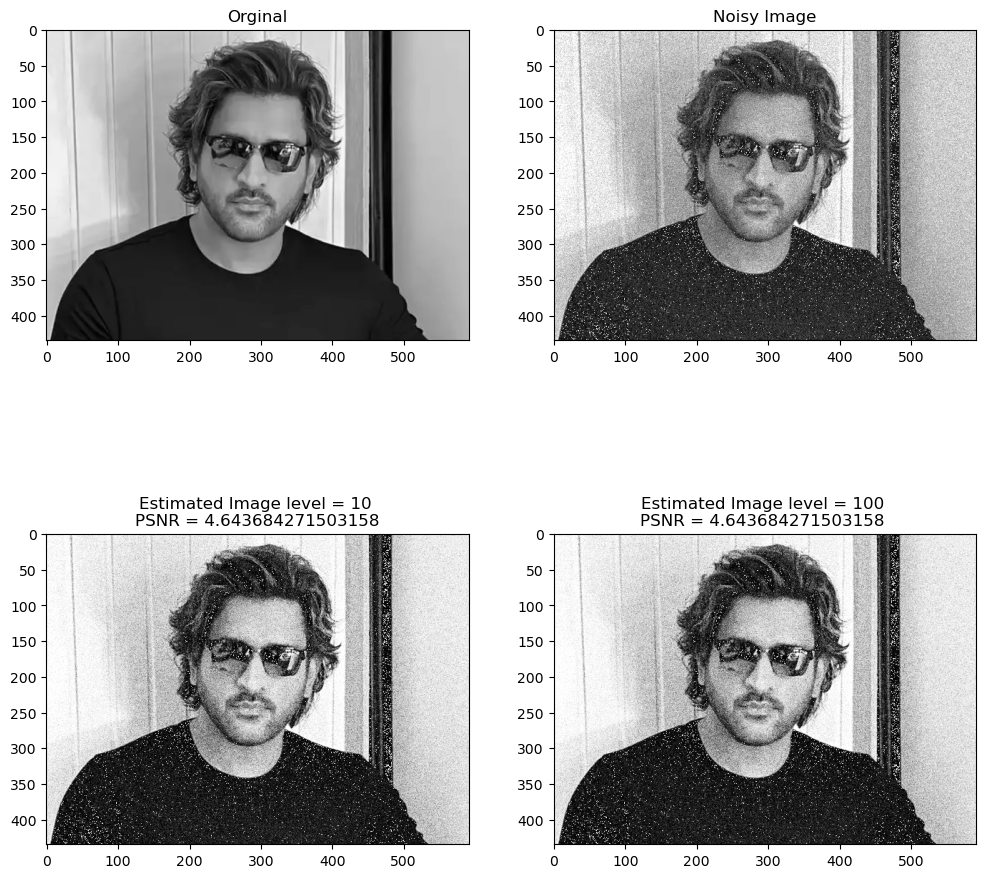

In [36]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(img_gray,cmap='gray')
plt.subplot(2,2,2)
plt.title("Noisy Image")
plt.imshow(gaussian_noise,cmap='gray')
plt.subplot(2,2,3)
plt.title(f"Estimated Image level = 10 \nPSNR = {psn}")
plt.imshow(estimated_image,cmap='gray')
plt.subplot(2,2,4)
plt.title(f"Estimated Image level = 100 \nPSNR = {psn2} ")
plt.imshow(estimated_image_2,cmap='gray')